**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import matplotlib.pylab as plt
import numpy as np
import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,'Line with slope = 0.75 and uncertanity ')

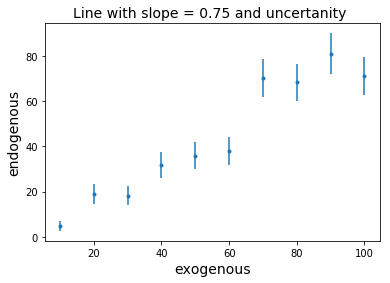

In [3]:
# Define x
lis_x = np.linspace(start = 10, stop = 100, num = 10)

# Obatin y using line and error function
lis_y = line(a = 0.75, b=0 ,x = lis_x, errors = errors)

# Plot x and y
plt.errorbar(lis_x, lis_y, yerr = errors(lis_y), fmt='.')
plt.xlabel('exogenous', fontsize=14)
plt.ylabel('endogenous', fontsize=14)
plt.title('Line with slope = 0.75 and uncertanity ', fontsize=14)

#### Fig 1:
The points in plot above are drawn from a line of slope 0.75 added with some uncertanity. The errorbar show the uncertainity corresponding to each point.

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print( " y : ", lis_y)
print( " x : ", lis_x)
lis_xWithConstants =sm.add_constant(lis_x)
print(" x after adding constants: ", lis_xWithConstants)

 y :  [  4.75598717  19.04937379  18.17305426  31.74886763  35.82172512
  37.80391801  70.38256793  68.29846332  81.09972517  71.35739254]
 x :  [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
 x after adding constants:  [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 4. plot the data (as points) and both statsmodels fits

In [8]:
#THE WRONG WAY
mod_smfitW = smf.OLS(lis_y, lis_x).fit()
mod_smfitW.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     407.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           8.33e-09
Time:                        22:03:41   Log-Likelihood:                -34.274
No. Observations:                  10   AIC:                             70.55
Df Residuals:                       9   BIC:                             70.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8085      0.040     20.197      0.000         0.718     0.899
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.591
Skew:                           0.453   Prob(JB):                        0.744
Kurtosis:                       2.227   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model:
1. Here we see, we have a very high R-square of 0.978. This is because without intercept, the regression line tends to fit our data in wrong way. 
2. the coef(0.8085) of x is higher than our actual slope of 0.75.

In [7]:
#THE RIGHT WAY
mod_smfitR = smf.OLS(lis_y, lis_xWithConstants).fit()
mod_smfitR.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     88.71
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.32e-05
Time:                        22:03:39   Log-Likelihood:                -34.110
No. Observations:                  10   AIC:                             72.22
Df Residuals:                       8   BIC:                             72.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.8934      5.599     -0.517      0.619       -15.804    10.017
x1             0.8499      0.090      9.419      0.000         0.642     1.058
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.288
Skew:                           0.185   Prob(JB):                        0.866
Kurtosis:                       2.254   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model:
1. Model has a high r-square of 0.865. Thus, the regression line is able to explain 86% of variation in our data.
2. The coef of x1 which is 0.6720 is close to the actual slope 0.75.

Text(0.5,1,'Original data with fitted regression lines')

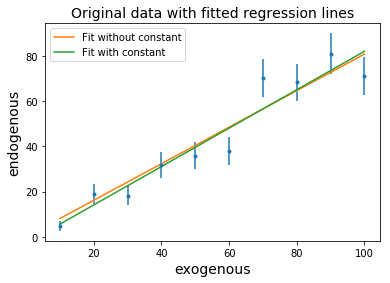

In [9]:
# Create predictions
lis_yPredW = mod_smfitW.predict(lis_x)
lis_yPredR = mod_smfitR.predict(lis_xWithConstants)

# Create plots
plt.errorbar(lis_x, lis_y, yerr = errors(lis_y), fmt='.')
plt.xlabel('exogenous', fontsize=14)
plt.ylabel('endogenous', fontsize=14)

ax1 = plt.plot(lis_x, lis_yPredW, '-', label='Fit without constant')
ax2 = plt.plot(lis_x, lis_yPredR, '-', label='Fit with constant')

plt.legend()


plt.title('Original data with fitted regression lines', fontsize=14)

#### Fig2:

1. The above graph shows the original data points fitted with regression lines from models with constants and withouth constants.
2. From the graph we can see the line of model with constant is passing through the origin whereas, the other is not. Adding constant to model helps to address the need of intercept in regression line.

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,1,'Line with slope = 0.75, intercept = 76 and uncertanity ')

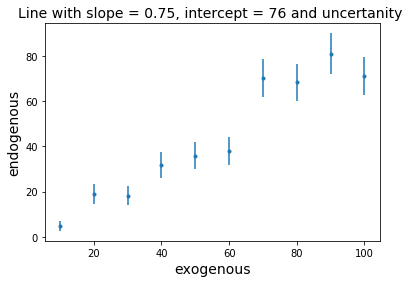

In [10]:
# Obatin y using line and error function
lis_y2 = line(a = 0.75, b=76, x = lis_x, errors = errors)

# Plot x and y
plt.errorbar(lis_x, lis_y, yerr = errors(lis_y), fmt='.')
plt.xlabel('exogenous', fontsize=14)
plt.ylabel('endogenous', fontsize=14)
plt.title('Line with slope = 0.75, intercept = 76 and uncertanity ', fontsize=14)

#### Fig3:
The points in plot above are drawn from a line of slope 0.75, intecept 76 and added with some uncertanity. The errorbar show the uncertainity corresponding to each point.

# 6. repeat step 3

In [11]:
#THE WRONG WAY
mod_smfitW2 = smf.OLS(lis_y2, lis_x).fit()
mod_smfitW2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     91.97
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           5.06e-06
Time:                        22:04:21   Log-Likelihood:                -49.812
No. Observations:                  10   AIC:                             101.6
Df Residuals:                       9   BIC:                             101.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.8158      0.189      9.590      0.000         1.387     2.244
==============================================================================
Omnibus:                        2.131   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                0.878
Skew:                           0.175   Prob(JB):                        0.645
Kurtosis:                       1.591   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model:

This model is not correct as there is no intercept in this.

In [12]:
#THE RIGHT WAY
mod_smfitR2 = smf.OLS(lis_y2, lis_xWithConstants).fit()
mod_smfitR2.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     123.8
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.81e-06
Time:                        22:05:21   Log-Likelihood:                -31.074
No. Observations:                  10   AIC:                             66.15
Df Residuals:                       8   BIC:                             66.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         75.2329      4.133     18.204      0.000        65.703    84.763
x1             0.7410      0.067     11.126      0.000         0.587     0.895
==============================================================================
Omnibus:                        2.525   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                0.853
Skew:                           0.714   Prob(JB):                        0.653
Kurtosis:                       3.102   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model:

1. This model is correct as it has goo r-squared.
2. The coef of x1 (0.7410) is close to our actual slope of 75. and coef of constant is close to our intercept of 76. 

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [13]:
w = errors(lis_y2)
mod_wls = sm.WLS(lis_y2, lis_xWithConstants, weights=1./w).fit()
print(mod_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            WLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     123.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.79e-06
Time:                        22:07:22   Log-Likelihood:                -31.013
No. Observations:                  10   AIC:                             66.03
Df Residuals:                       8   BIC:                             66.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         75.3419      3.950     19.075      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### Model:

1. With WLS our regression line fits our data more appropriately. This is evident by the high r2 score.
2. Coef of x and coef of intercept is close to actual slope and intercept of 0.75 and 76

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

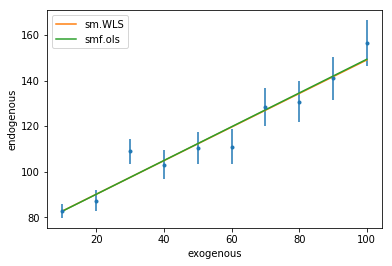

In [14]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':np.array(lis_x), 'y':np.array(lis_y2), 'const':np.ones(len(lis_x))}).fit()
plt.errorbar(lis_x, lis_y2, yerr=errors(lis_x), fmt='.')
plt.plot(lis_x, mod_wls.fittedvalues, '-', label="sm.WLS")
plt.plot(lis_x, smfmodel.fittedvalues, '-', label="smf.ols")
plt.xlabel("exogenous")
plt.ylabel("endogenous")
plt.legend();